<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>


<center><h1> Sesión 8. Clustering.</header1></centre>

Miller Janny Ariza Garzón. \
Febrero de 2022

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python/')

## Descripción problema

Tenemos un dataset compuesto por 200 datos de clientes de centros comerciales. El marco de datos incluye el customerID, el género, la edad, los ingresos anuales y una puntuación de gasto de cada cliente. La puntuación de gasto es una puntuación en función de varios criterios, entre los que se incluyen, por ejemplo, el número de veces por semana que acuden al centro comercial y el dinero que han gastado en un año. Esta puntuación oscila entre 1 y 100. Así que nuestro objetivo es encontrar algunos clusters para perfilar los tipos de clientes.

In [1]:
import pandas as pd
df_starup = pd.read_csv('C:/Users/gaad0/Tecnicas IA/MaterialAdicional_TIA/Mall_Customers.csv')
df_starup.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Descripción del Dataset

In [2]:
df_starup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df_starup['Gender'] = df_starup['Gender'].astype('category')
df_starup = df_starup.set_index('CustomerID')

In [4]:
df_starup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    category
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 6.6 KB


In [5]:
 df_starup.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df_starup.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# Aplicación de K-Means con dos variables

In [7]:
data = df_starup[['Annual Income (k$)','Spending Score (1-100)']]
#data.reset_index(drop=True, inplace=True)
data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


## ¿Cuántos clusters? (Elbow Method)

In [8]:
# Encontrar el número de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

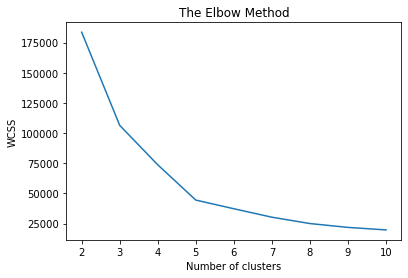

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Definición de clusters k-means

In [10]:
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42).fit(data)
data['cluster'] = kmeans.labels_
data.head()

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,2
2,15,81,3
3,16,6,2
4,16,77,3
5,17,40,2


In [11]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centers['freq']=data['cluster'].value_counts()
centers['freq_r']=data['cluster'].value_counts(normalize=True)
print(centers)

   Annual Income (k$)  Spending Score (1-100)  freq  freq_r
0           55.296296               49.518519    81   0.405
1           88.200000               17.114286    35   0.175
2           26.304348               20.913043    23   0.115
3           25.727273               79.363636    22   0.110
4           86.538462               82.128205    39   0.195


In [12]:
cluster_map = pd.DataFrame()
cluster_map['customer_id'] = data.index.values
cluster_map['cluster'] = kmeans.labels_

In [ ]:
cluster_map[cluster_map.cluster == 2]

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
data['S_S'] = silhouette_samples(data,data['cluster'])
silhouette_score_mean = silhouette_score(data,data['cluster'])
print(silhouette_score_mean)

0.5552365209836292


In [15]:
#data['cluster']=data_sd['cluster']
Centers_mean=data.groupby('cluster').mean()
Centers_mean['freq']=data['cluster'].value_counts()
Centers_mean['freq_r']=data['cluster'].value_counts(normalize=True)
Centers_mean

,Annual Income (k$),Spending Score (1-100),S_S,freq,freq_r
cluster,,,,,
0,55.296296,49.518519,0.598064,81,0.405
1,88.200000,17.114286,0.504175,35,0.175
2,26.304348,20.913043,0.513139,23,0.115
3,25.727273,79.363636,0.600465,22,0.110
4,86.538462,82.128205,0.511514,39,0.195


## Visualización clusters con dos variables

In [ ]:
import seaborn as sns 
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', style='cluster', 
                     ax=ax, data=data)
ax.set_xlim(10, 150)
ax.set_ylim(1, 100)
centers.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', ax=ax, s=50, color='black')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data[data['cluster']==0]['Annual Income (k$)'], data[data['cluster']==0]['Spending Score (1-100)'], s = 60, c = 'blue', label = 'Cluster1')
plt.scatter(data[data['cluster']==1]['Annual Income (k$)'], data[data['cluster']==1]['Spending Score (1-100)'], s = 60, c = 'violet', label = 'Cluster2')
plt.scatter(data[data['cluster']==2]['Annual Income (k$)'], data[data['cluster']==2]['Spending Score (1-100)'], s = 60, c = 'yellow', label = 'Cluster3')
plt.scatter(data[data['cluster']==3]['Annual Income (k$)'], data[data['cluster']==3]['Spending Score (1-100)'], s = 60, c = 'red', label = 'Cluster4')
plt.scatter(data[data['cluster']==4]['Annual Income (k$)'], data[data['cluster']==4]['Spending Score (1-100)'], s = 60, c = 'green', label = 'Cluster5') 
plt.scatter(centers['Annual Income (k$)'], centers['Spending Score (1-100)'], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend()             
plt.show()

## Caracterización de los clusters

Debemos caracterizar los clusters:

+ Cluster 1:Cliente estándar.
+ Cluster 2:Cliente cuidadoso-cliente potencial.
+ Cluster 3:Cliente sensible-de cuidado.
+ Cluster 4:Cliente descuidado-riesgoso.
+ Cluster 5:Cliente objetivo.

# K-means con todas las variables

In [16]:
# preprocessing
data1 = df_starup[['Annual Income (k$)','Spending Score (1-100)', 'Age']]
data1['Gender_M'] = (df_starup['Gender'] == 'Male')*1.0
data1.reset_index(drop=True, inplace=True)

In [17]:
data1.head()

,Annual Income (k$),Spending Score (1-100),Age,Gender_M
0,15,39,19,1.0
1,15,81,21,1.0
2,16,6,20,0.0
3,16,77,23,0.0
4,17,40,31,0.0


## Elbow Method

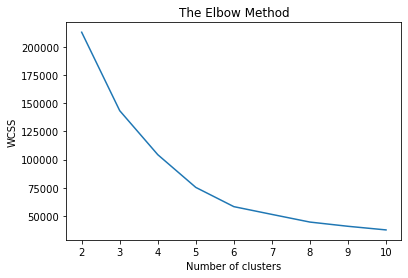

In [18]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)


    
import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Definición de clusters

In [19]:
import warnings
warnings.filterwarnings('ignore')
kmeans1 = KMeans(n_clusters = 6, init = "k-means++", random_state = 42).fit(data1)
data1['cluster'] = kmeans1.labels_

centers1 = pd.DataFrame(kmeans1.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender_M'])

centers1['freq']=data1['cluster'].value_counts()
centers1['freq_r']=data1['cluster'].value_counts(normalize=True)
centers1

,Annual Income (k$),Spending Score (1-100),Age,Gender_M,freq,freq_r
0,86.538462,82.128205,32.692308,0.461538,39,0.195
1,53.377778,49.088889,56.155556,0.444444,45,0.225
2,25.727273,79.363636,25.272727,0.409091,22,0.110
3,88.228571,17.285714,41.685714,0.571429,35,0.175
4,56.657895,49.131579,27.000000,0.342105,38,0.190
5,25.142857,19.523810,44.142857,0.380952,21,0.105


## Clusters con data transformada (StandardScale)
## K-means

In [20]:
from sklearn import preprocessing
data1.pop("cluster")
data_sd = preprocessing.scale(data1)
data_sd = pd.DataFrame(data_sd, columns = ['Annual Income (k$)_s', 'Spending Score (1-100)_s', 'Age_s', 'Gender_M_s'])
data_sd.head()

,Annual Income (k$)_s,Spending Score (1-100)_s,Age_s,Gender_M_s
0,-1.738999,-0.434801,-1.424569,1.128152
1,-1.738999,1.195704,-1.281035,1.128152
2,-1.700830,-1.715913,-1.352802,-0.886405
3,-1.700830,1.040418,-1.137502,-0.886405
4,-1.662660,-0.395980,-0.563369,-0.886405


## Elbow Method

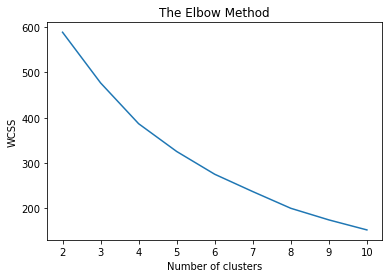

In [21]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(data_sd)
    wcss.append(kmeans.inertia_)


    
import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Definición de clusters data escalada

In [22]:
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = 8, init = "k-means++", random_state = 42).fit(data_sd)
data_sd['cluster'] = kmeans.labels_

centers2 = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)_s', 'Spending Score (1-100)_s', 'Age_s', 'Gender_M_s'])
centers2['freq']=data_sd['cluster'].value_counts()
centers2['freq_r']=data_sd['cluster'].value_counts(normalize=True)
print(centers2)

   Annual Income (k$)_s  Spending Score (1-100)_s     Age_s  Gender_M_s  freq  \
0             -0.493545                 -0.440553  1.376990    1.128152    27   
1              0.943271                  1.179823 -0.452456   -0.886405    22   
2             -0.737052                  0.416038 -0.976027    1.128152    24   
3              0.997749                 -0.960834  0.157887   -0.886405    20   
4              0.967012                 -1.397168 -0.027007    1.128152    19   
5             -0.528180                 -0.367942  0.891900   -0.886405    36   
6             -0.802726                  0.361041 -0.922202   -0.886405    34   
7              1.013441                  1.260407 -0.399900    1.128152    18   

   freq_r  
0   0.135  
1   0.110  
2   0.120  
3   0.100  
4   0.095  
5   0.180  
6   0.170  
7   0.090  


## Definición de clusters con data en unidades reales

In [23]:
mu =data1.mean()
sd=data1.std()
centers_inv=pd.DataFrame(index=centers2.index)
centers_inv['Annual Income (k$)']=centers2['Annual Income (k$)_s']*sd['Annual Income (k$)']+mu['Annual Income (k$)']
centers_inv['Spending Score (1-100)']=centers2['Spending Score (1-100)_s']*sd['Spending Score (1-100)']+mu['Spending Score (1-100)']
centers_inv['Age']=centers2['Age_s']*sd['Age']+mu['Age']
centers_inv['Gender_M']=centers2['Gender_M_s']*sd['Gender_M']+mu['Gender_M']
centers_inv['freq']=centers2['freq']
centers_inv

,Annual Income (k$),Spending Score (1-100),Age,Gender_M,freq
0,47.597182,38.823375,58.085185,1.001405,27
1,85.334742,80.667172,32.529634,-0.001104,22
2,41.201543,60.943559,25.215872,1.001405,24
3,86.765596,25.387892,41.055521,-0.001104,20
4,85.958312,14.120214,38.472740,1.001405,19
5,46.687498,40.698439,51.308964,-0.001104,36
6,39.476637,59.523338,25.967754,-0.001104,34
7,87.177739,82.748139,33.263795,1.001405,18


## Evaluación. Silhouette score

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
data1['S_S'] = silhouette_samples(data_sd,data_sd['cluster'])
silhouette_score_mean = silhouette_score(data_sd,data_sd['cluster'])
print(silhouette_score_mean)

0.5453547636797776


In [26]:
data1['cluster']=data_sd['cluster']
Centers_mean=data1.groupby('cluster').mean()
Centers_mean['freq']=data1['cluster'].value_counts()
Centers_mean['freq_r']=data1['cluster'].value_counts(normalize=True)
Centers_mean

,Annual Income (k$),Spending Score (1-100),Age,Gender_M,S_S,freq,freq_r
cluster,,,,,,,
0,47.629630,38.851852,58.037037,1.0,0.586699,27,0.135
1,85.272727,80.590909,32.545455,0.0,0.711400,22,0.110
2,41.250000,60.916667,25.250000,1.0,0.563596,24,0.120
3,86.700000,25.450000,41.050000,0.0,0.484337,20,0.100
4,85.894737,14.210526,38.473684,1.0,0.477416,19,0.095
5,46.722222,40.722222,51.277778,0.0,0.490390,36,0.180
6,39.529412,59.500000,26.000000,0.0,0.461917,34,0.170
7,87.111111,82.666667,33.277778,1.0,0.663117,18,0.090


# Cluster Jerárquico

In [ ]:
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data_sd, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

## Definición de clusters y evaluación

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(data_sd)
data1['cluster_hc']=y_hc
data_sd['cluster_hc']=y_hc
data1['S_S_hc'] = silhouette_samples(data_sd,data_sd['cluster_hc'])
silhouette_score_mean_hc = silhouette_score(data_sd,data_sd['cluster_hc'])
print(silhouette_score_mean_hc)


In [ ]:
data1

In [ ]:
Centers_mean_hc=data1.groupby('cluster_hc').mean()
Centers_mean_hc['freq_hc']=data1['cluster_hc'].value_counts()
Centers_mean_hc['freq_r_hc']=data1['cluster_hc'].value_counts(normalize=True)
Centers_mean_hc=Centers_mean_hc.drop(['cluster','S_S'], axis=1)
Centers_mean_hc

# DBSCAN
## Definición de clusters y evaluación

In [27]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
#pip install hdbscan
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=15)
y_dbs = dbscan.fit_predict(data_sd)
silhouette_score(data_sd, y_dbs)

0.4953530580907256

In [28]:
data1['cluster_dbs']=y_dbs
data_sd['cluster_dbs']=y_dbs
data1['S_S_dbs'] = silhouette_samples(data_sd,data_sd['cluster_dbs'])
silhouette_score_mean_hc = silhouette_score(data_sd,data_sd['cluster_dbs'])
Centers_mean_dbs=data1.groupby('cluster_dbs').mean()
Centers_mean_dbs['freq_dbs']=data1['cluster_dbs'].value_counts()
Centers_mean_dbs['freq_r_dbs']=data1['cluster_dbs'].value_counts(normalize=True)
Centers_mean_dbs=Centers_mean_dbs.drop(['cluster','S_S','cluster_hc','S_S_hc'], axis=1)
Centers_mean_dbs

KeyError: "['cluster_hc' 'S_S_hc'] not found in axis"